2019-01-01 2019-03-31
2019-03
2019-01-01 2019-04-30
2019-04
2019-01-01 2019-06-30
2019-06
2019-01-01 2019-07-31
2019-07


C:\Users\Miriam Yochebel\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


2019-01-01 2019-12-31
2019-12


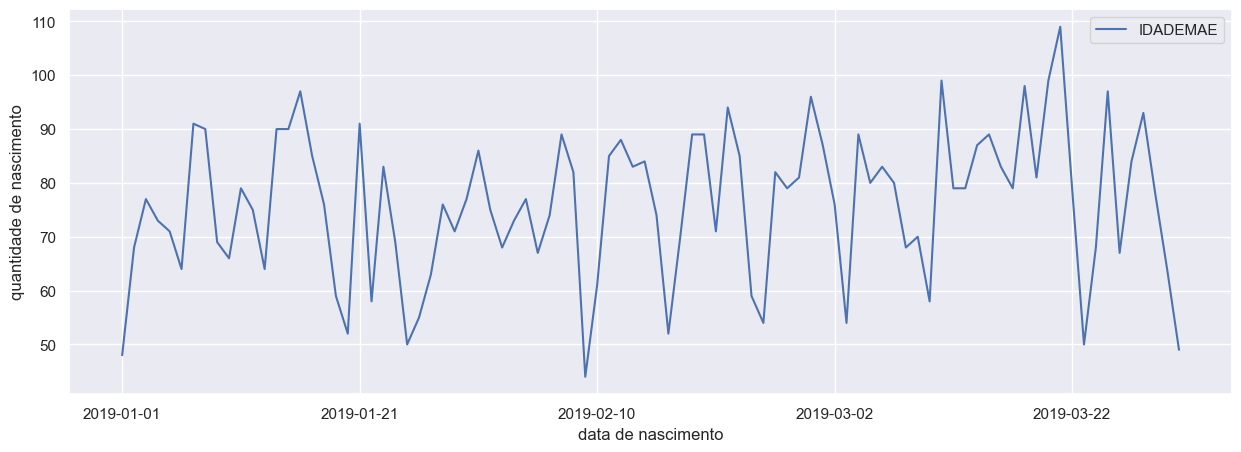

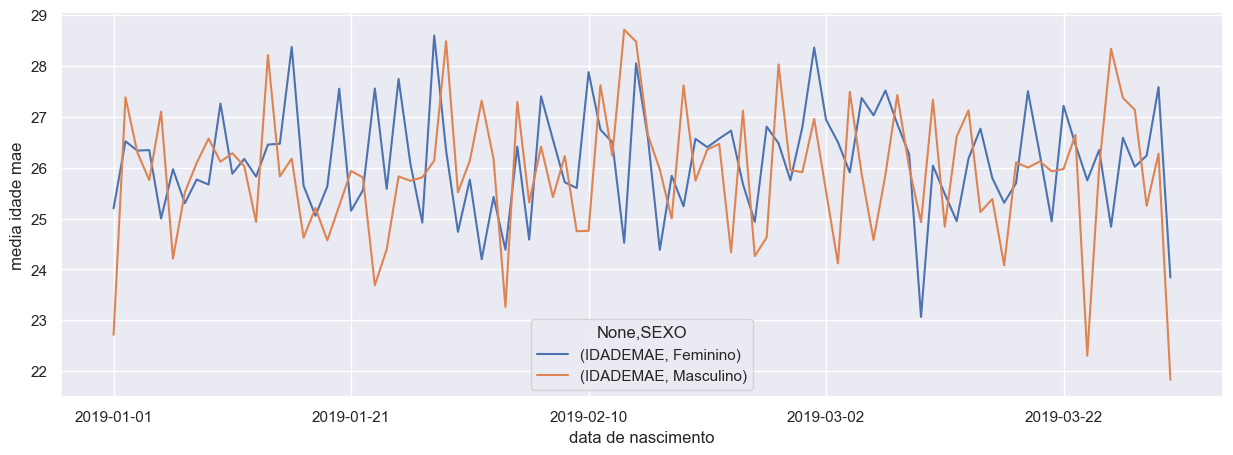

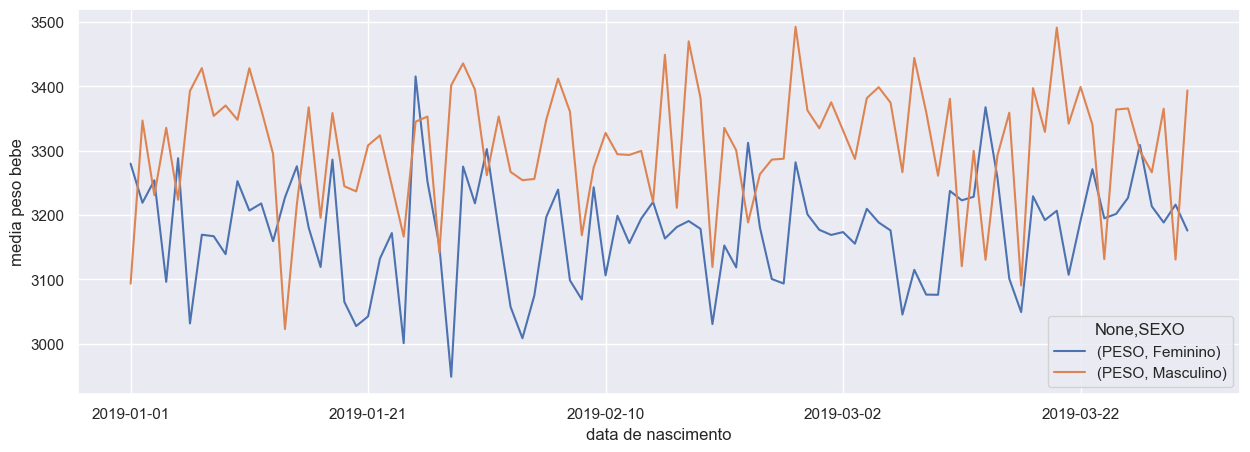

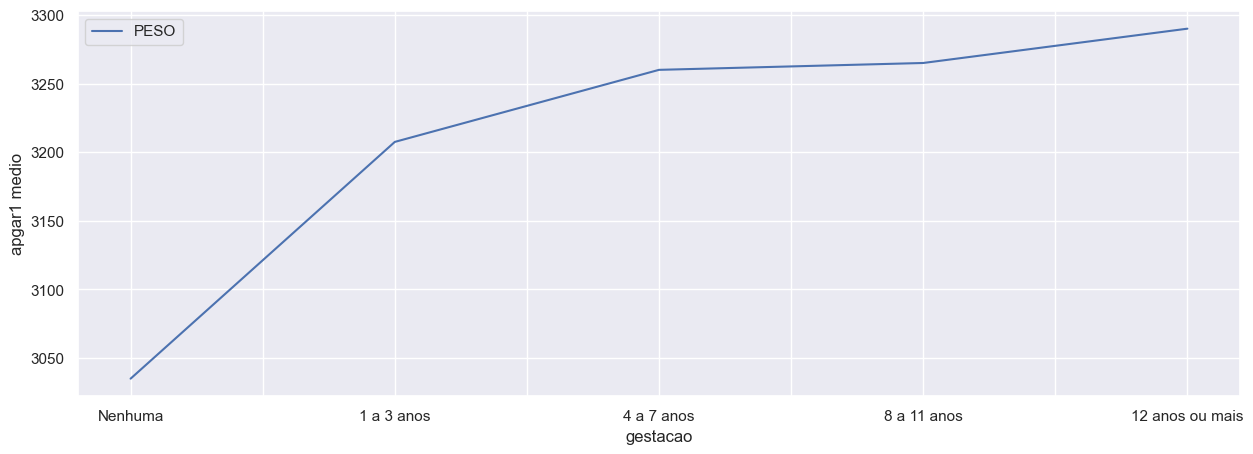

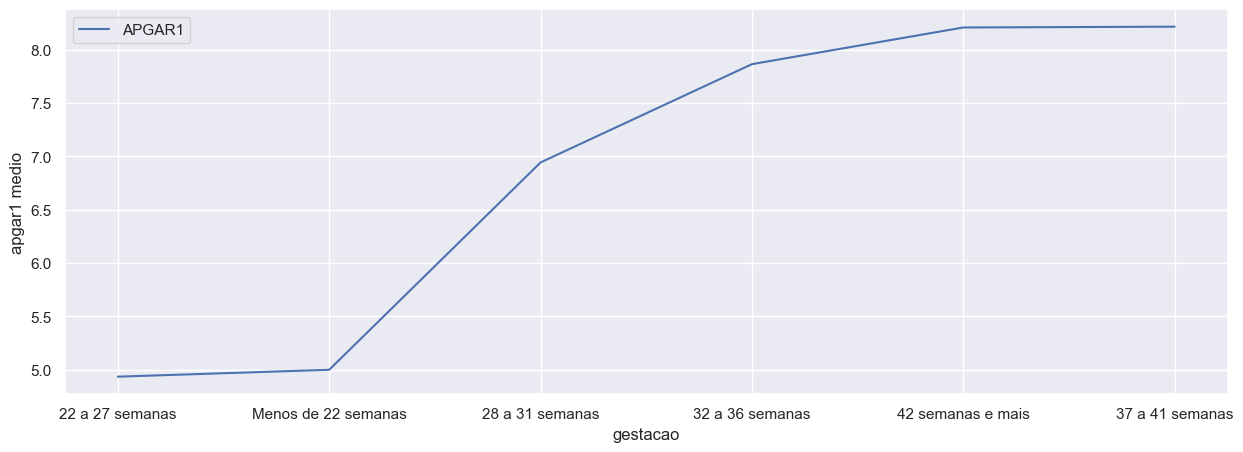

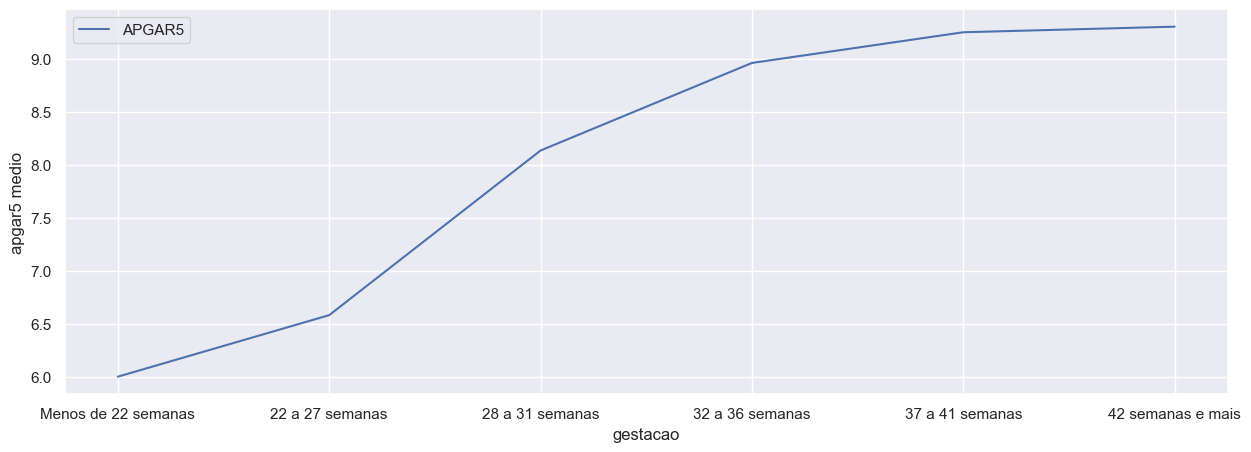

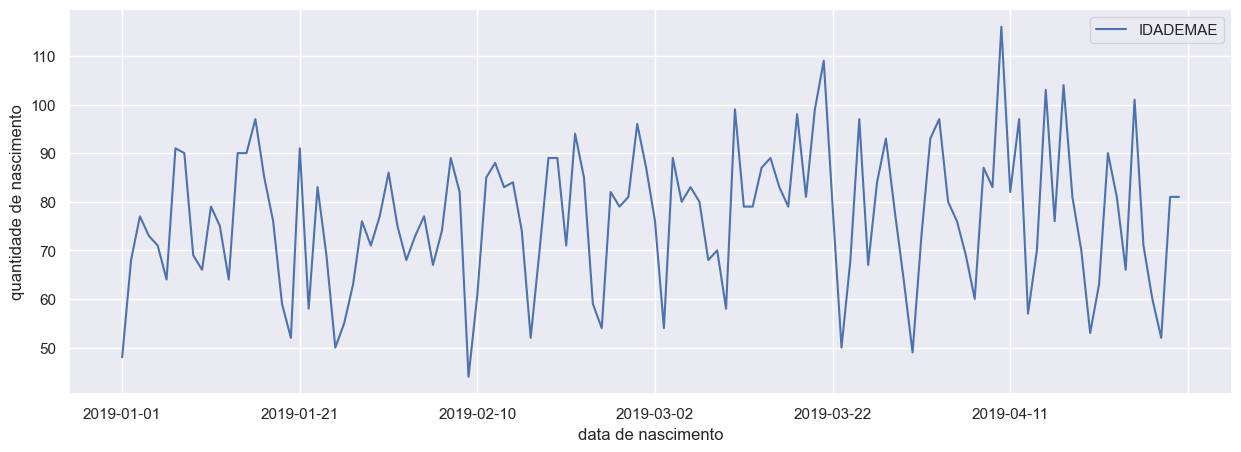

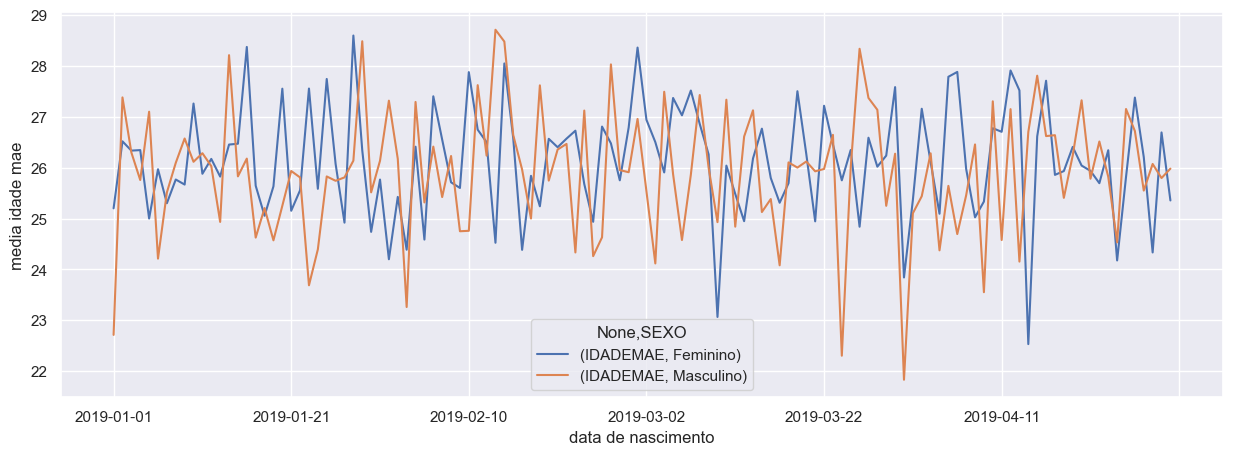

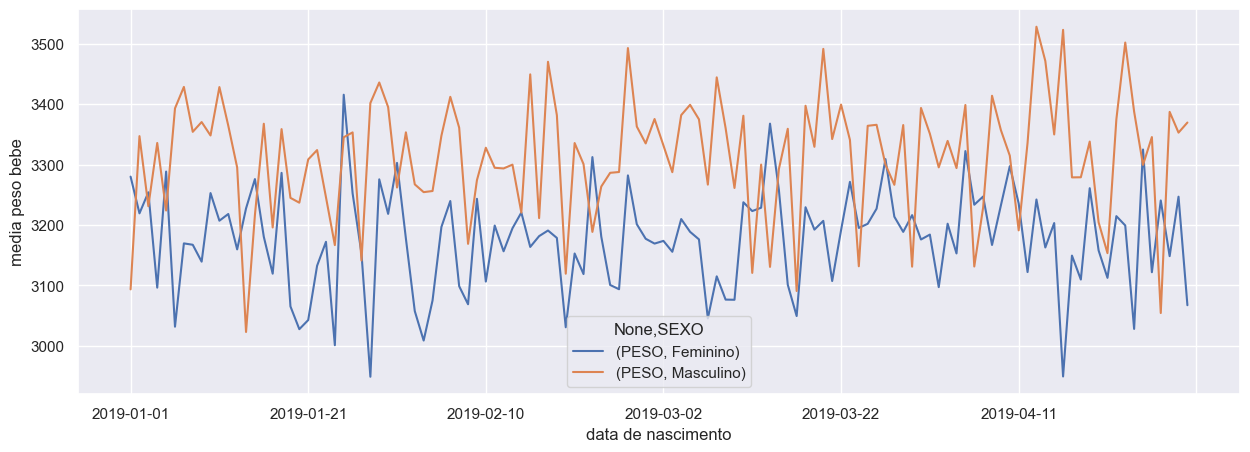

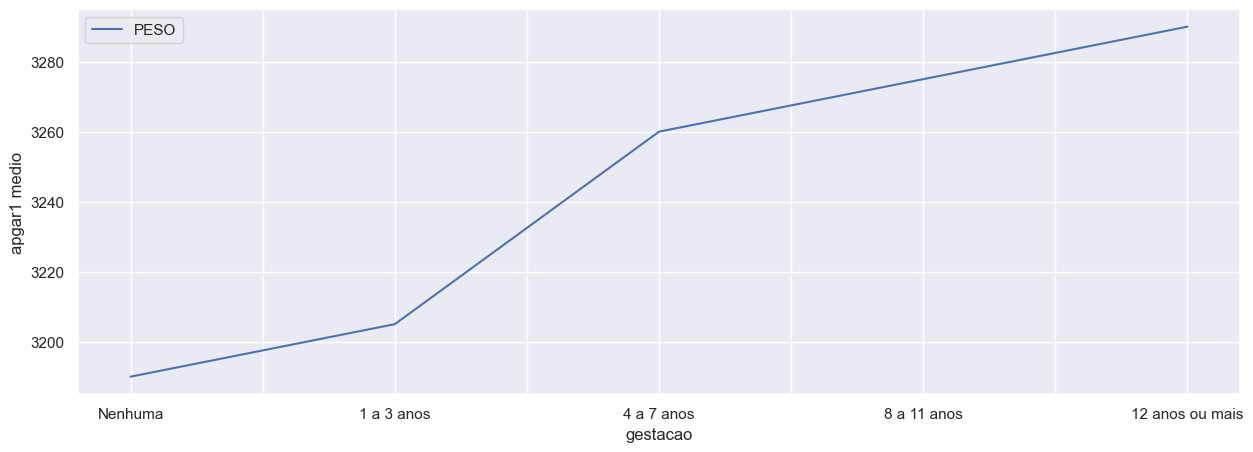

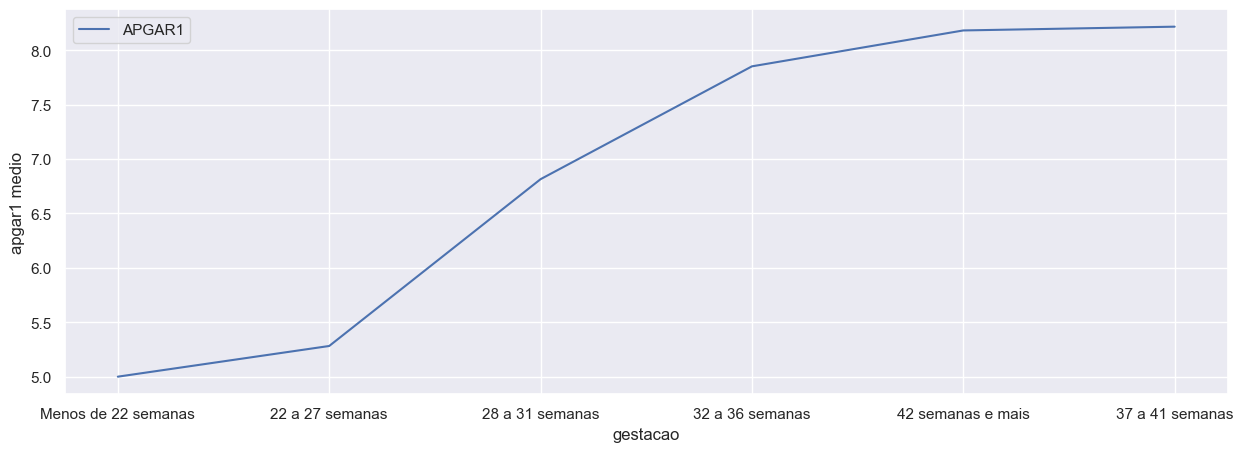

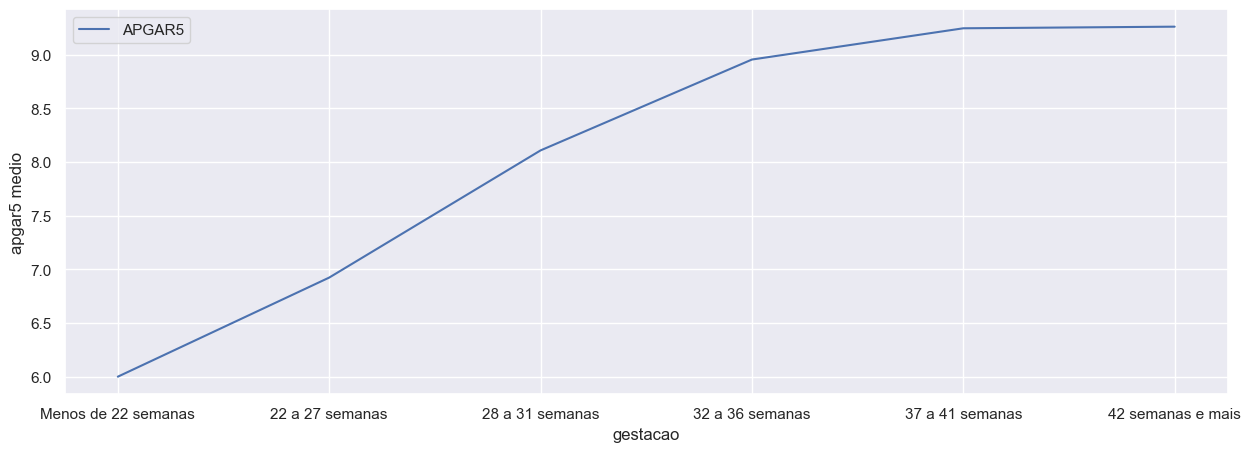

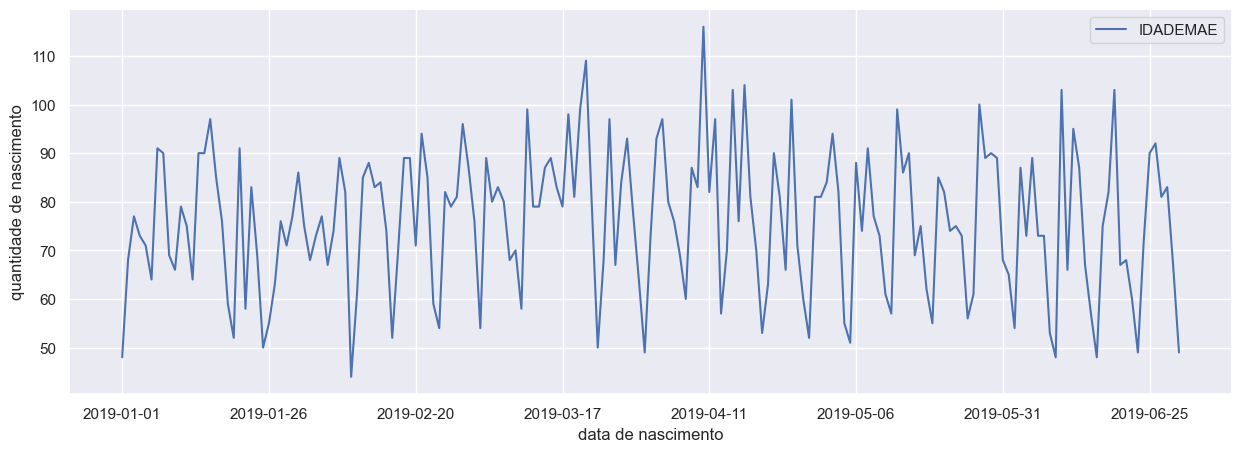

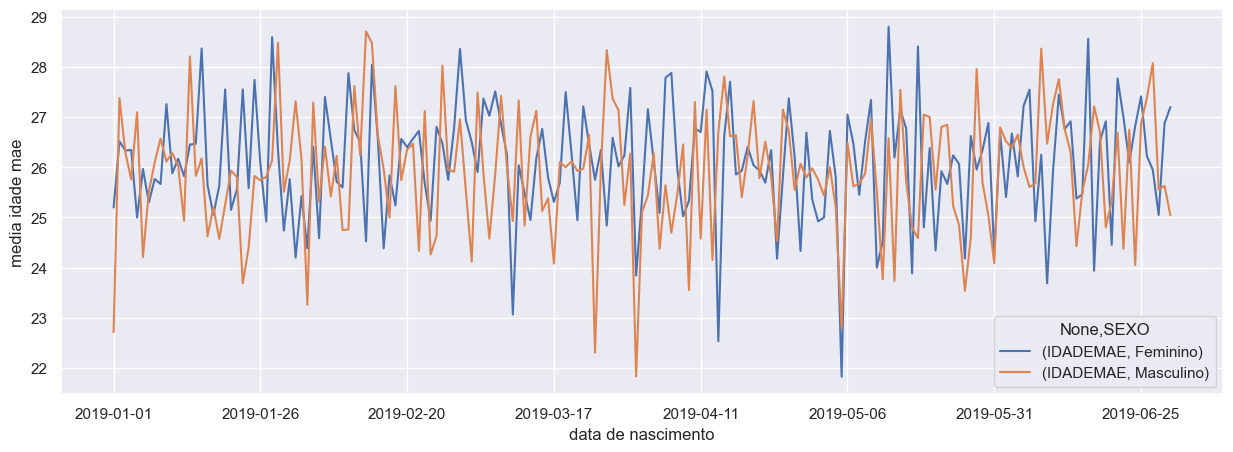

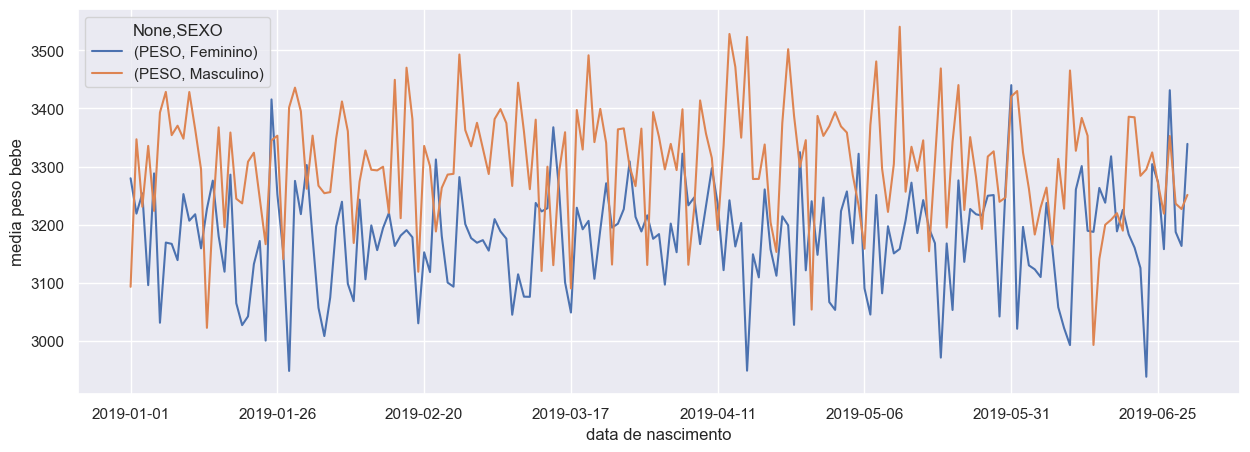

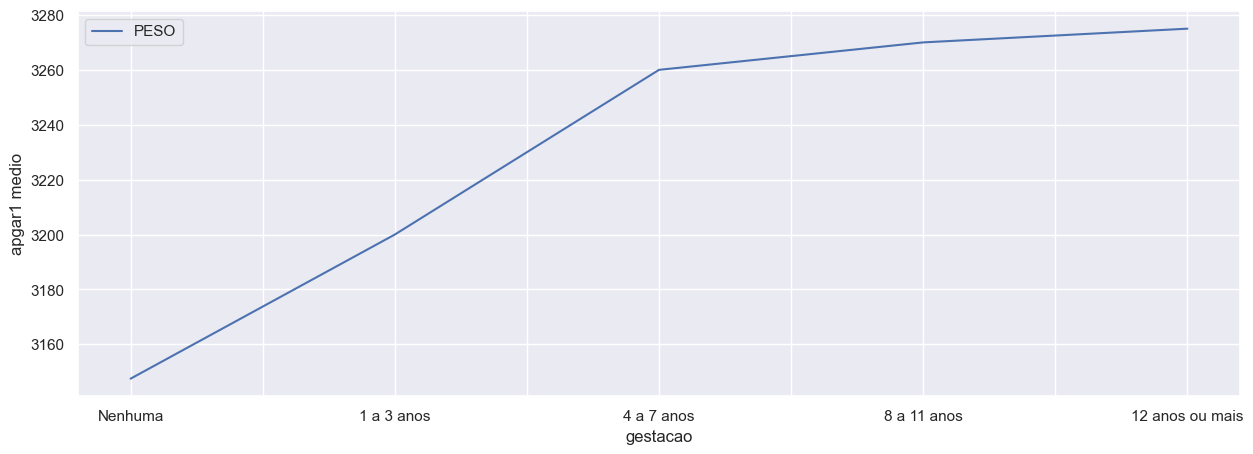

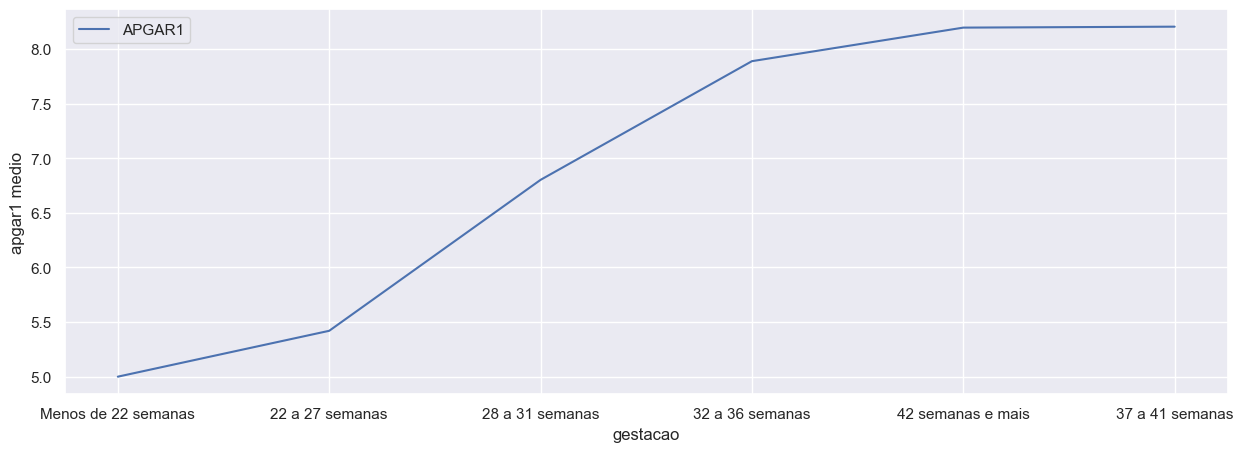

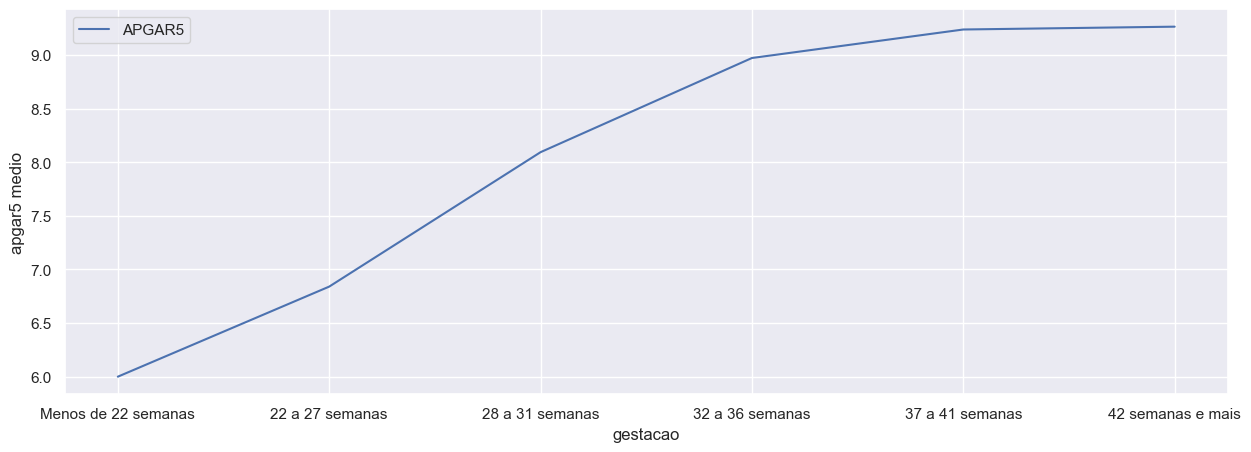

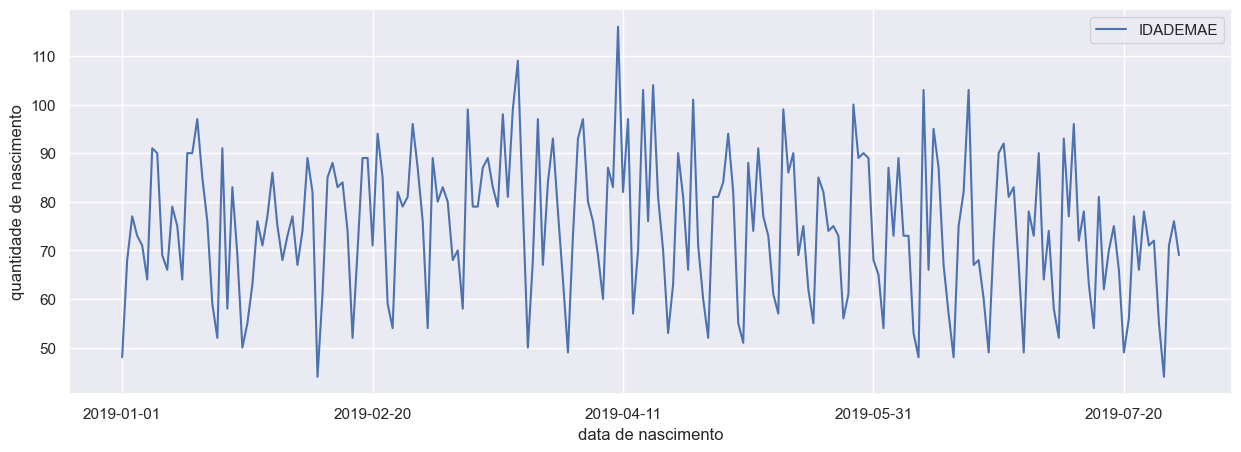

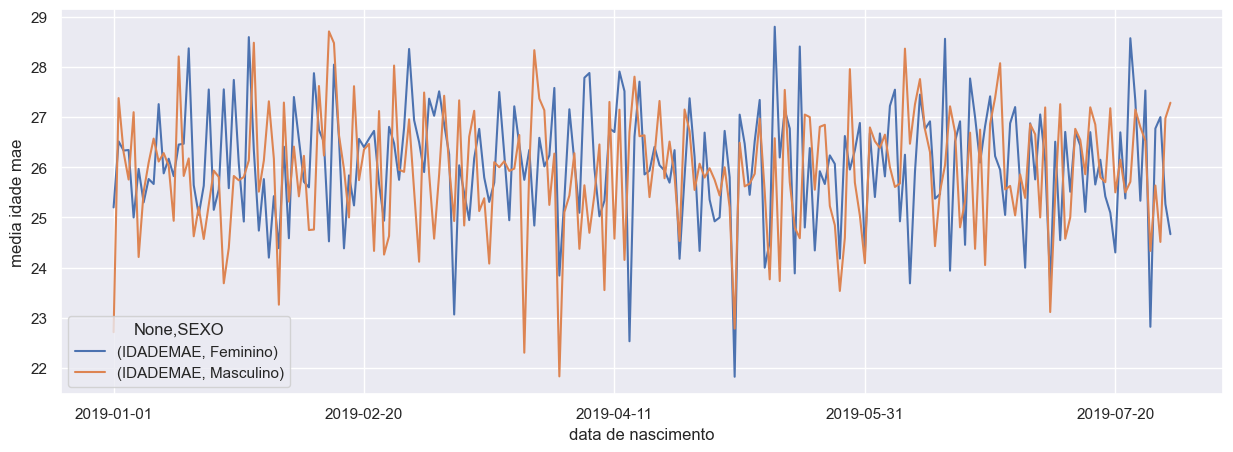

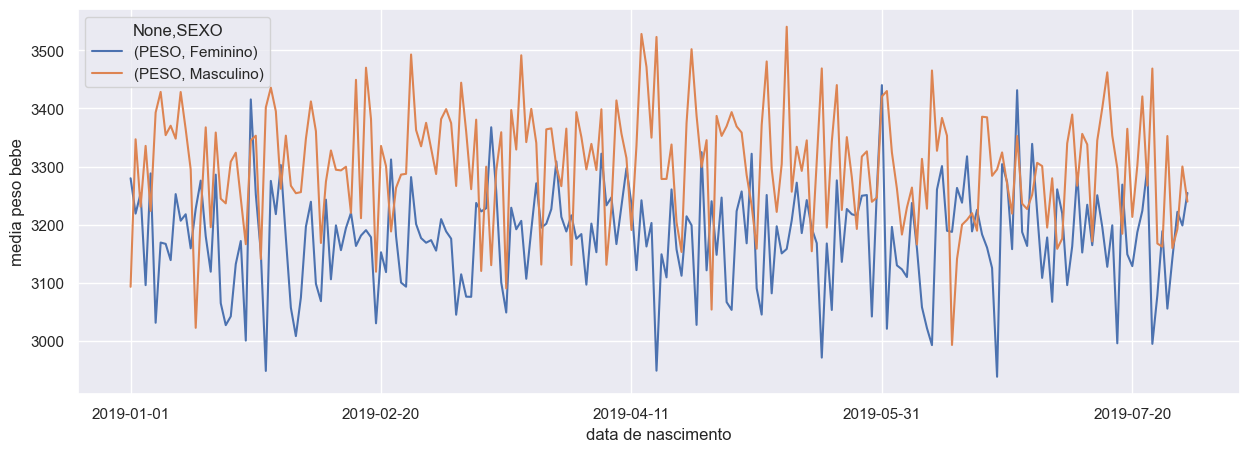

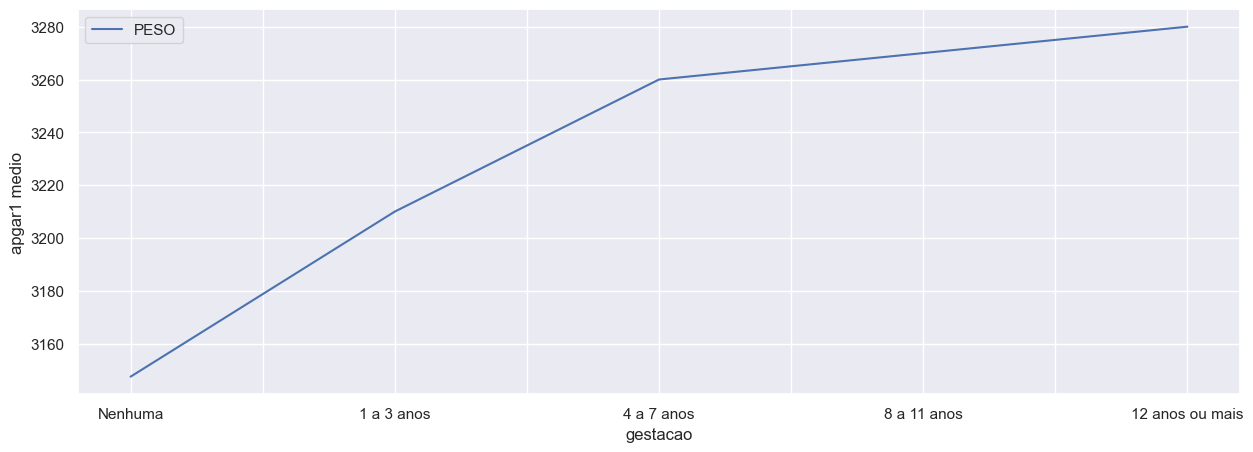

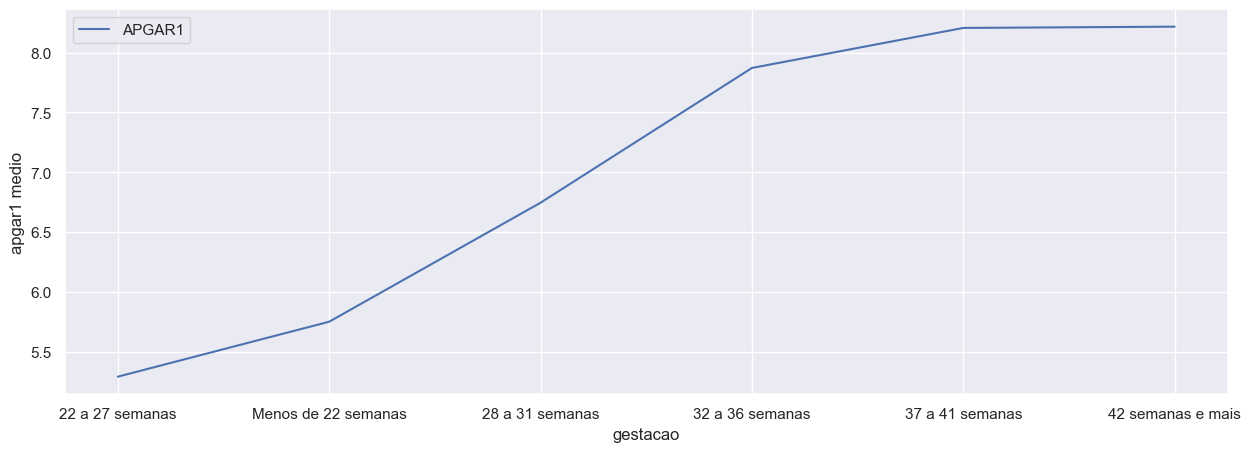

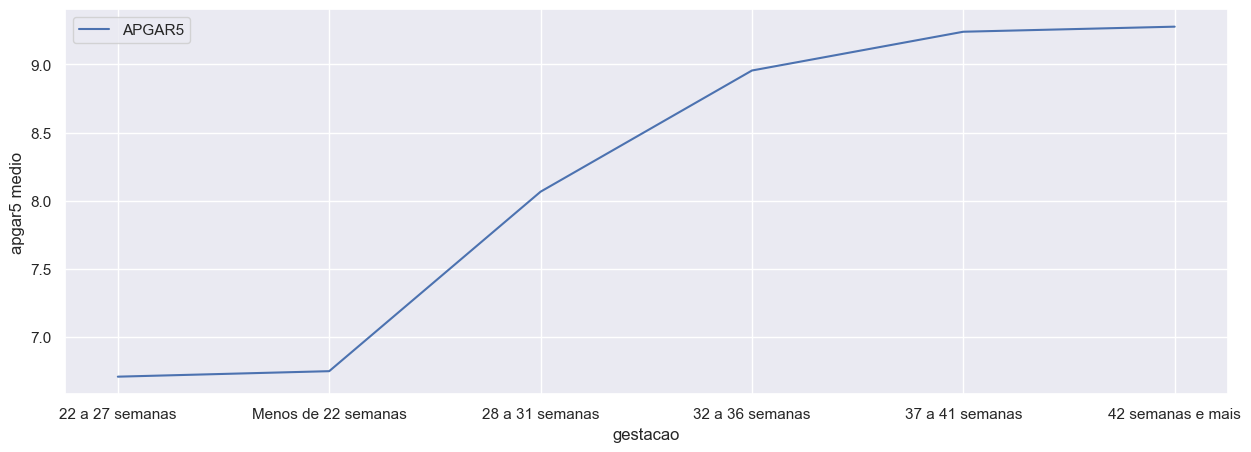

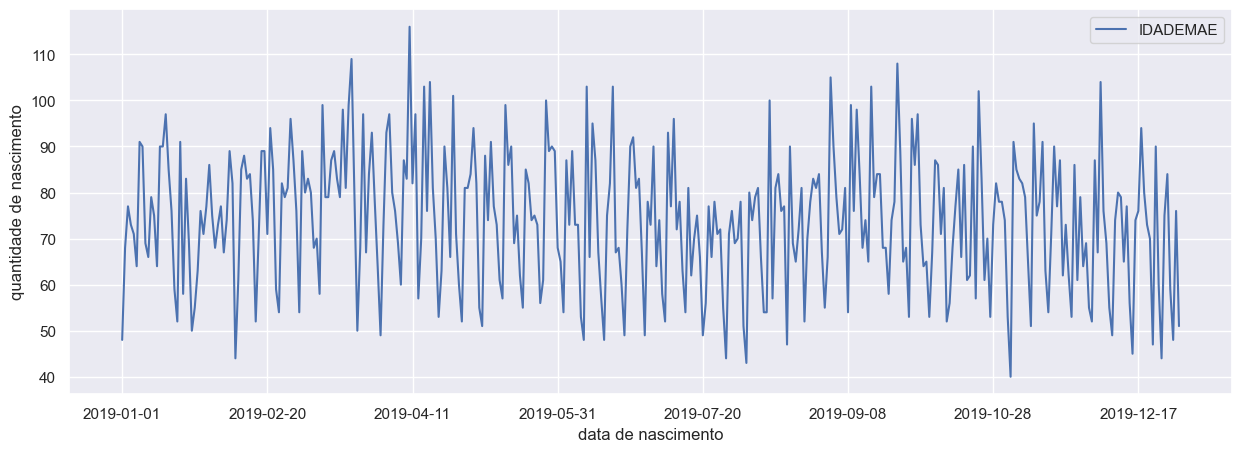

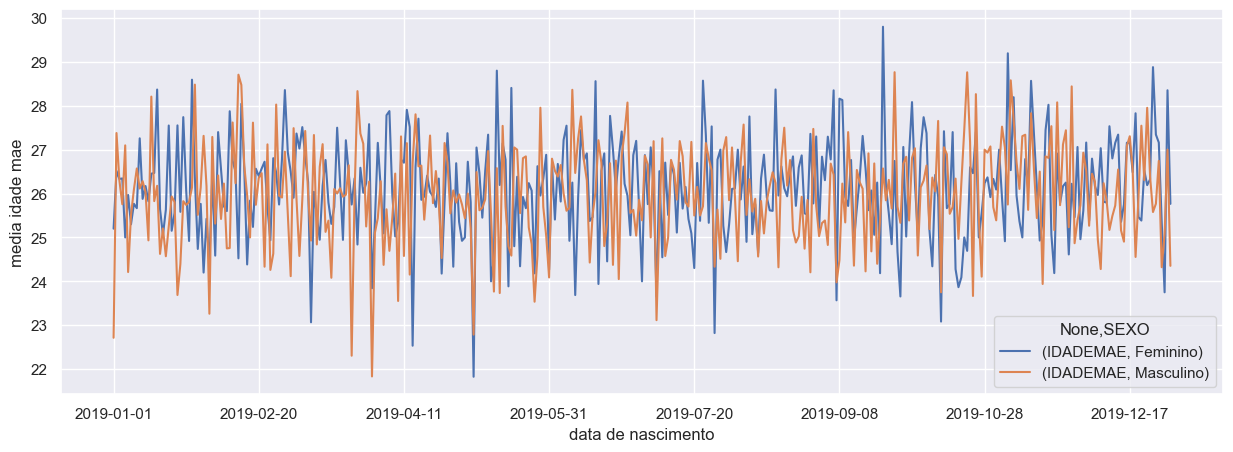

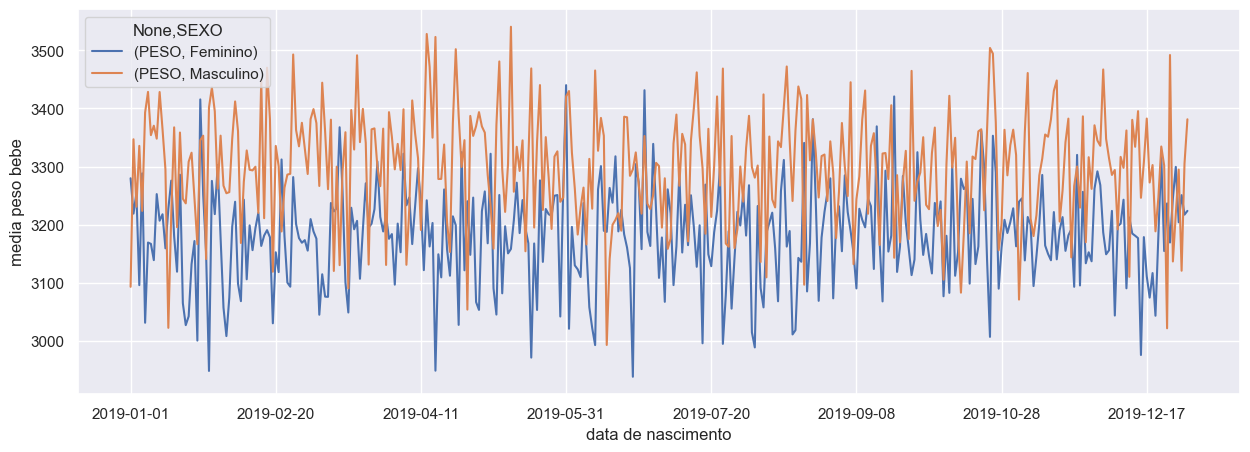

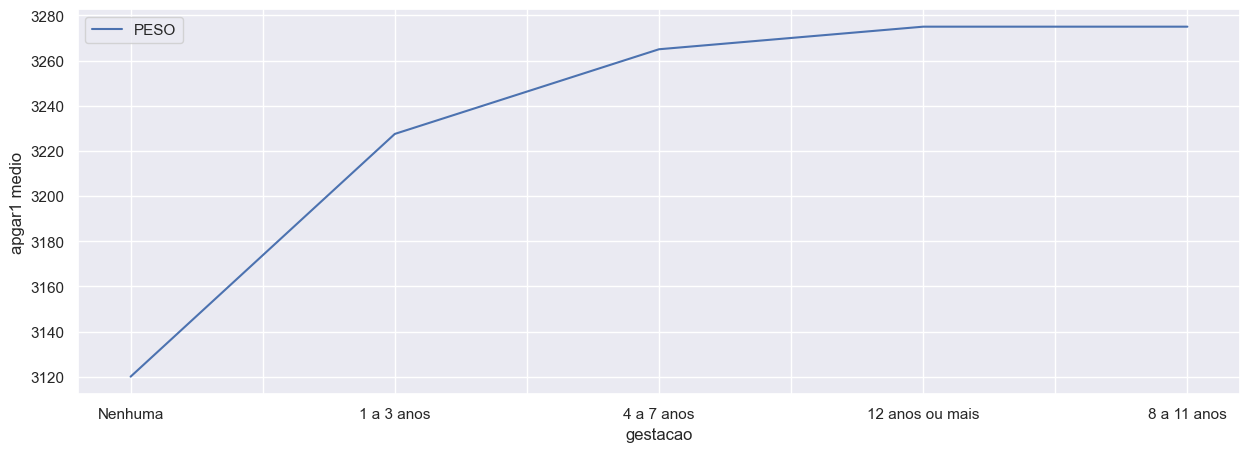

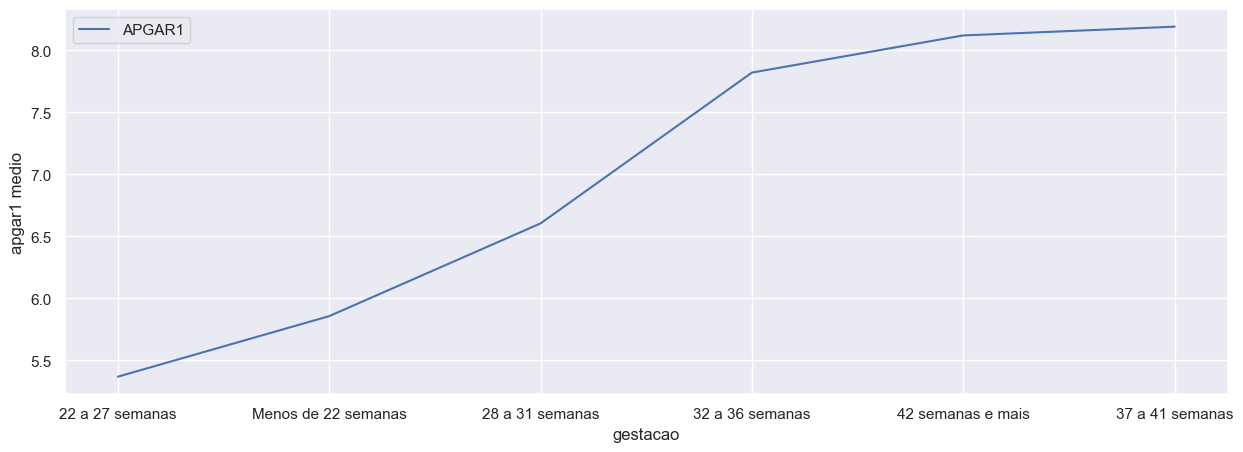

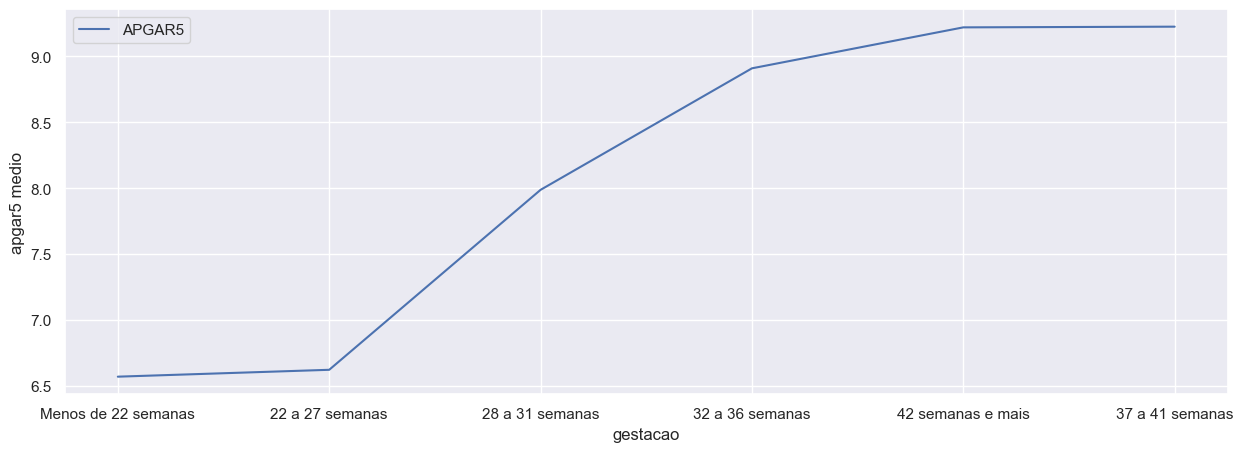

In [7]:
# Importando as bibliotecas necessárias
import pandas as pd  # Pandas é uma biblioteca para manipulação e análise de dados
import seaborn as sns  # Seaborn é uma biblioteca para visualização estatística de dados
import matplotlib.pyplot as plt  # Matplotlib é uma biblioteca para criação de gráficos
import os  # Os fornece uma maneira de usar funcionalidades dependentes do sistema operacional
sns.set_theme()  # Configura o tema padrão do Seaborn para os gráficos

# Definindo uma função para plotar tabelas pivô
def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    # Verifica a opção e plota a tabela pivô correspondente
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    
    # Adiciona rótulos aos eixos e retorna None
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

# Lista de meses
meses = ['MAR', 'ABR', 'JUN', 'JUL', 'DEZ']

# Itera sobre os meses
for mes in meses:
    # Lê o arquivo CSV correspondente ao mês
    sinasc = pd.read_csv(f'./Input/SINASC_RO_2019_{mes}.csv')
    
    # Exibe as datas mínima e máxima de nascimento
    print(sinasc.DTNASC.min(), sinasc.DTNASC.max())

    # Obtém a parte relevante da data máxima
    max_data = sinasc.DTNASC.max()[:7]
    print(max_data)
    
    # Cria o diretório para salvar as figuras, se ainda não existir
    os.makedirs('./output/figs/'+max_data, exist_ok=True)

    # Plota a tabela pivô para a quantidade de nascimentos
    plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'count', 'quantidade de nascimento','data de nascimento')
    
    # Salva a figura no diretório correspondente
    plt.savefig('./output/figs/'+max_data+'/quantidade de nascimento.png')

    # Plota a tabela pivô para a média de idade da mãe por sexo
    plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
    
    # Salva a figura no diretório correspondente
    plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

    # Plota a tabela pivô para a média de peso do bebê por sexo
    plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
    
    # Salva a figura no diretório correspondente
    plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')

    # Plota a tabela pivô para a mediana do peso do bebê por escolaridade da mãe
    plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort')
    
    # Salva a figura no diretório correspondente
    plt.savefig('./output/figs/'+max_data+'/media apgar1 por escolaridade mae.png')

    # Plota a tabela pivô para a média de APGAR1 por duração da gestação
    plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
    
    # Salva a figura no diretório correspondente
    plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

    # Plota a tabela pivô para a média de APGAR5 por duração da gestação
    plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')
    
    # Salva a figura no diretório correspondente
    plt.savefig('./output/figs/'+max_data+'/media apgar5 por gestacao.png')
